In [38]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#uploading the dataset
df = pd.read_csv('../data/US_Accidents_March23.csv')

In [3]:
#displaying all the columns
pd.set_option('display.max_columns', None)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
#getting more info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
#seeing how many nulls are in each column
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
#note we have class imbalanced 
df['Severity'].value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

In [7]:
#seeing how many countries we are working with 
df['Country'].unique()

array(['US'], dtype=object)

In [8]:
#dropping columns we won't be using
df = df.drop(columns=['Source', 'Country', 'Airport_Code', 'Timezone', 'Wind_Direction'])

In [9]:
#making sure the format for all the values are the same 
#deleting the value after the .
df['Start_Time'] = [str(value).split('.')[0] for value in df['Start_Time']]
df['End_Time'] = [str(value).split('.')[0] for value in df['End_Time']]

In [10]:
# df.loc[3639775, 'Start_Time'] = '2017-07-23 04:21:01'
# df.loc[3639776, 'Start_Time'] = '2017-07-23 05:18:46'

In [11]:
#making sure it's removed
df['End_Time'][3639777]

'2017-07-23 11:36:01'

In [12]:
#changing the format to date/time
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y-%m-%d %H:%M:%S")
df['End_Time'] = pd.to_datetime(df['End_Time'], format="%Y-%m-%d %H:%M:%S")
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format="%Y-%m-%d %H:%M:%S")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 41 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Weather_Timestamp      datetime64[ns]
 16  Temperature(F)         float64       
 17  Wind_Chill(F)          float64       
 18  Humidity(%)           

In [15]:
#creating a new column that shows how long each of the accident were
df['Duration'] = df['End_Time'] - df['Start_Time']

In [46]:
df['Duration'].value_counts()

Duration
0 days 06:00:00    369307
0 days 00:30:00    116096
0 days 00:45:00     70075
0 days 01:15:00     61374
0 days 01:00:00     61173
                    ...  
1 days 02:30:42         1
1 days 02:20:59         1
1 days 02:40:05         1
0 days 11:42:56         1
1 days 22:37:30         1
Name: count, Length: 74038, dtype: int64

/var/folders/wr/g705p4v548q9pr0f6xzqsgmw0000gn/T/ipykernel_2222/3594058648.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins = 24, kde=False, norm_hist=True);


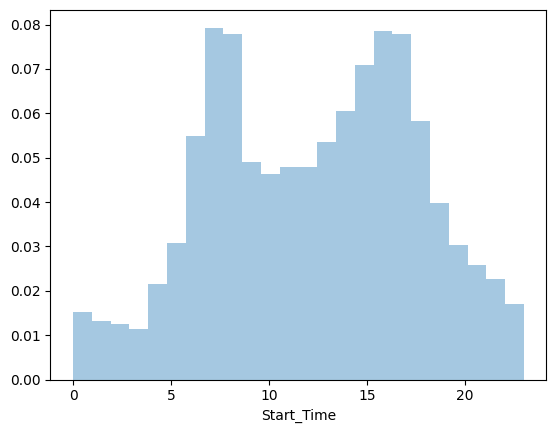

In [79]:
#The number of accidents throughout the day
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde=False, norm_hist=True); #extracting the hour from the timestamp

We can see a big uptick in accidents during the morning/afternoon rush hour when most people are commuting.

In [76]:
df.groupby(by="Start_Time")['ID'].count()

Start_Time
2016-01-14 20:18:33    7
2016-02-08 00:37:08    1
2016-02-08 05:46:00    1
2016-02-08 05:56:20    1
2016-02-08 06:07:59    1
                      ..
2023-03-31 23:18:00    1
2023-03-31 23:19:00    1
2023-03-31 23:21:00    1
2023-03-31 23:25:30    1
2023-03-31 23:30:00    1
Name: ID, Length: 5801064, dtype: int64

### Accidents by Weather Condition

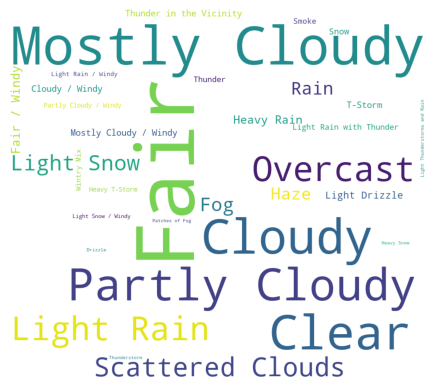

In [39]:
#seeing which words in weather condition has the most weights
data = df['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(width = 900, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

Surprisingly, most of the accidents are due to fair/cloudy conditions as opposed to snow/rain. 

### States with the most accidents

In [50]:
states_by_accident = df.State.value_counts()
states_by_accident[:10]

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64

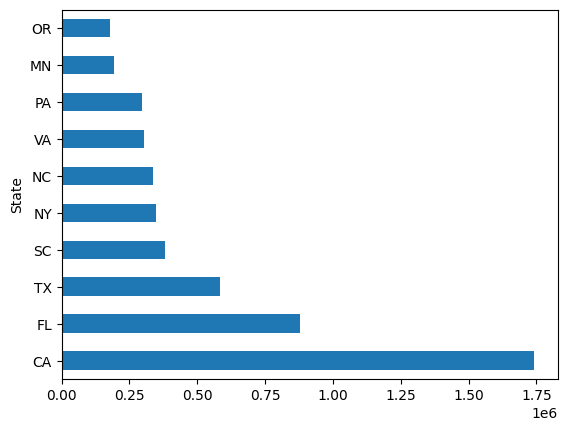

In [75]:
states_by_accident[:10].plot(kind = 'barh');

In [80]:
#only using the top 5 states with the most accidents

# Create a list of states to keep
states_to_keep = ['CA', 'FL', 'TX', 'SC', 'NY']

# Create a new DataFrame by filtering the rows
new_df = df[df['State'].isin(states_to_keep)]

In [81]:
#checking to see how many null values we have with the top 5 states
new_df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1668365
End_Lng                  1668365
Distance(mi)                   0
Description                    5
Street                      5179
City                          72
County                         0
State                          0
Zipcode                     1364
Weather_Timestamp          51900
Temperature(F)             77112
Wind_Chill(F)            1092700
Humidity(%)                82223
Pressure(in)               61526
Visibility(mi)             71411
Wind_Speed(mph)           285897
Precipitation(in)        1146211
Weather_Condition          68758
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway   

### Cities with the most accidents (Top 5 states)

In [91]:
cities_by_accident = new_df.City.value_counts()
cities_by_accident

City
Miami                      186768
Houston                    169428
Los Angeles                156491
Dallas                     130303
Orlando                    109690
                            ...  
Cedar Park-Liberty Hill         1
Cattaraugus                     1
West Columbia-Cayce             1
Swan Lake                       1
Pond Eddy                       1
Name: count, Length: 3995, dtype: int64

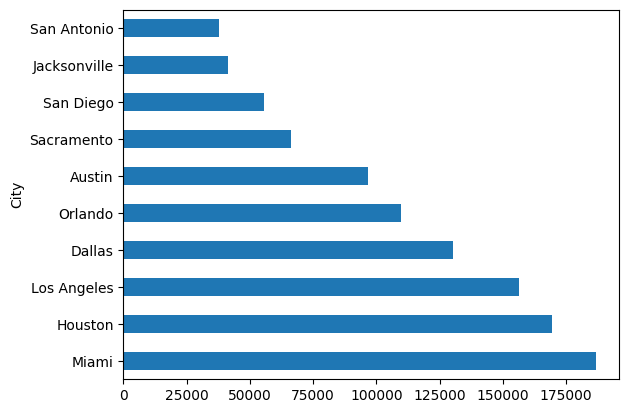

In [89]:
cities_by_accident[:10].plot(kind = 'barh');

In [82]:
new_df.describe()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Duration
count,3.934979e+06,3934979,3934979,3.934979e+06,3.934979e+06,2.266614e+06,2.266614e+06,3.934979e+06,3883079,3.857867e+06,2.842279e+06,3.852756e+06,3.873453e+06,3.863568e+06,3.649082e+06,2.788768e+06,3934979
mean,2.171599e+00,2020-06-08 03:13:52.750714112,2020-06-08 05:24:38.499112448,3.352583e+01,-9.996229e+01,3.345755e+01,-1.008570e+02,4.713214e-01,2020-06-07 22:25:08.797924096,6.661475e+01,6.509228e+01,6.392689e+01,2.974578e+01,9.195674e+00,7.484942e+00,8.286767e-03,0 days 02:10:45.748398911
min,1.000000e+00,2016-03-22 17:44:13,2016-03-22 22:05:41,2.455480e+01,-1.243750e+02,2.456601e+01,-1.244002e+02,0.000000e+00,2016-03-22 17:50:00,-7.780000e+01,-8.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0 days 00:01:55
25%,2.000000e+00,2018-11-26 18:18:13,2018-11-26 18:53:19.500000,2.991252e+01,-1.182846e+02,2.972554e+01,-1.184041e+02,0.000000e+00,2018-11-27 07:40:00,5.600000e+01,5.500000e+01,4.800000e+01,2.968000e+01,1.000000e+01,3.500000e+00,0.000000e+00,0 days 00:34:09
50%,2.000000e+00,2020-11-28 02:12:01,2020-11-28 04:57:20,3.394107e+01,-9.695830e+01,3.396003e+01,-9.776514e+01,2.500000e-02,2020-11-28 14:53:00,6.800000e+01,6.700000e+01,6.600000e+01,2.991000e+01,1.000000e+01,7.000000e+00,0.000000e+00,0 days 01:15:00
75%,2.000000e+00,2022-01-28 15:59:00,2022-01-28 18:03:55,3.697347e+01,-8.137821e+01,3.724276e+01,-8.126168e+01,3.570000e-01,2022-01-28 16:53:00,7.800000e+01,7.800000e+01,8.300000e+01,3.004000e+01,1.000000e+01,1.000000e+01,0.000000e+00,0 days 02:06:54
max,4.000000e+00,2023-03-31 23:25:30,2023-03-31 23:58:00,4.500189e+01,-7.186103e+01,4.499732e+01,-7.194368e+01,3.336300e+02,2023-03-31 23:53:00,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,2.400000e+01,1553 days 01:25:45
std,4.256172e-01,NaN,NaN,4.424693e+00,1.846296e+01,4.614963e+00,1.891370e+01,1.471723e+00,NaN,1.548392e+01,1.738006e+01,2.269094e+01,6.201363e-01,2.319638e+00,5.496522e+00,1.328826e-01,2 days 17:36:48.801942192


### Distributions of weather related columns 

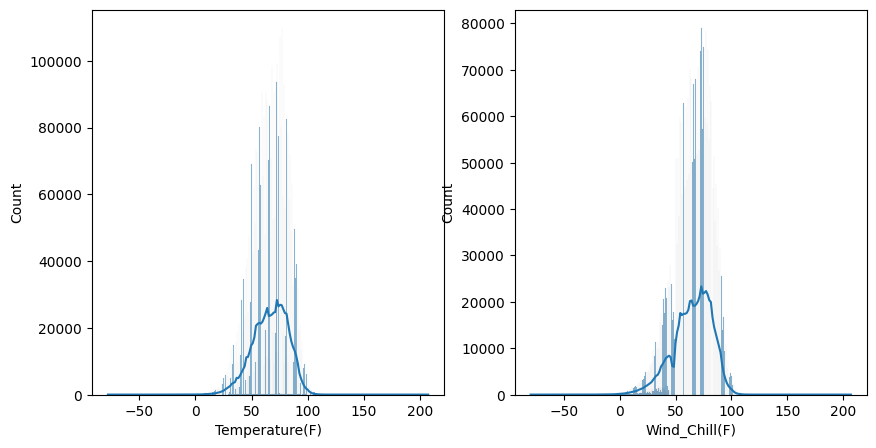

In [20]:
#examing the distribution of the temp to see what to fill in the missing values with 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=new_df, x='Temperature(F)', kde=True, ax=ax1)
sns.histplot(data=new_df, x='Wind_Chill(F)', kde=True, ax=ax2)

plt.show()

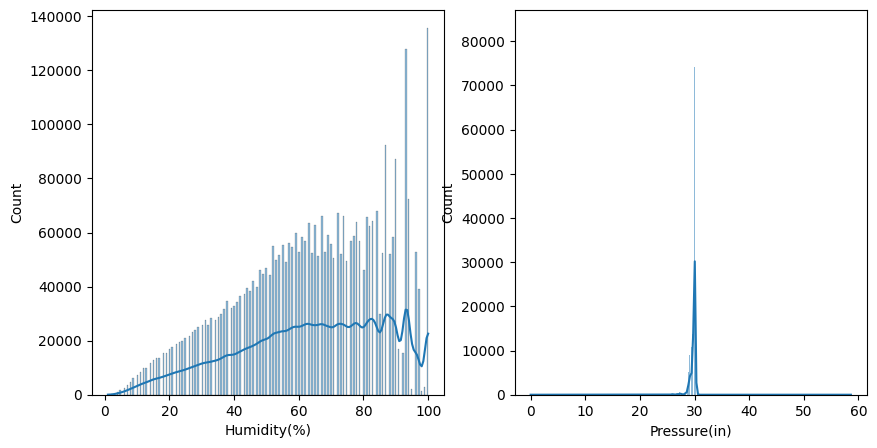

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=new_df, x='Humidity(%)', kde=True, ax=ax1)
sns.histplot(data=new_df, x='Pressure(in)', kde=True, ax=ax2)

plt.show()

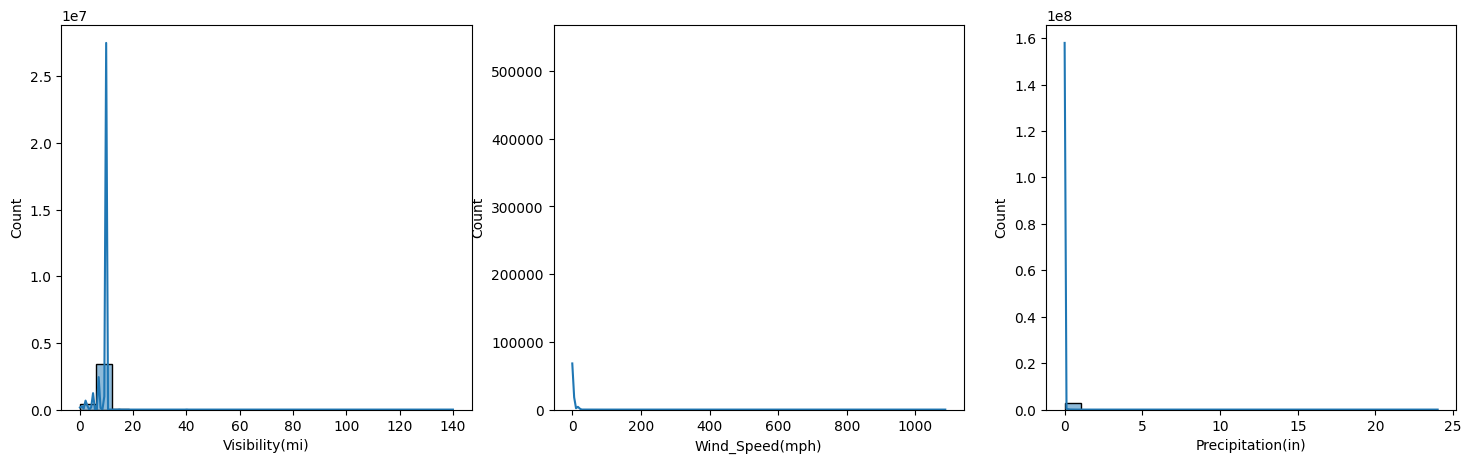

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=new_df, x='Visibility(mi)', kde=True, ax=ax1)
sns.histplot(data=new_df, x='Wind_Speed(mph)', kde=True, ax=ax2)
sns.histplot(data=new_df, x='Precipitation(in)', kde=True, ax=ax3)

plt.show()

In [55]:
#looking into the values in Wind Speed
new_df.sort_values(by='Wind_Speed(mph)', ascending=False)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
6274606,A-6320814,2,2021-12-16 12:31:00,2021-12-16 14:44:36,37.328360,-120.559242,37.328225,-120.558982,0.017,Accident from N Gurr Rd to Ashby Rd.,Ashby Rd,Atwater,Merced,CA,95301-5406,2021-12-16 12:45:00,50.0,50.0,100.0,29.91,10.0,1087.0,0.0,Cloudy / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 02:13:36
7092904,A-7142243,2,2020-03-28 14:49:27,2020-03-28 16:09:25,27.209430,-80.333700,27.209430,-80.333700,0.000,At SE Becker Rd/Exit 138 - Earlier accident.,SW Becker Rd,Port Saint Lucie,St. Lucie,FL,34953,2020-03-28 14:55:00,84.0,84.0,51.0,30.06,7.0,984.0,0.0,Fair / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 01:19:58
114588,A-114595,3,2016-06-13 18:44:57,2016-06-13 19:29:57,34.320553,-118.495262,NaN,NaN,0.000,Accident on I-5 Trk Northbound near I-5. On th...,I-5 N,Sylmar,Los Angeles,CA,91342,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,822.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:45:00
114580,A-114587,3,2016-06-13 18:28:43,2016-06-13 19:13:43,34.303253,-118.479774,NaN,NaN,0.000,Right hand shoulder blocked due to multi-vehic...,Roxford St,Sylmar,Los Angeles,CA,91342,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,822.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:45:00
114647,A-114654,3,2016-06-13 20:30:47,2016-06-13 21:15:47,34.266048,-118.450768,NaN,NaN,0.000,Accident on I-5 Northbound near Exits 156A 156...,Ronald Reagan Fwy W,Mission Hills,Los Angeles,CA,91345,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,822.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,0 days 00:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727583,A-7776951,2,2019-08-22 09:01:20,2019-08-22 09:29:38,27.999900,-82.335570,28.002780,-82.320840,0.920,At I-75/Exit 9 - Accident. Left lane blocked.,I-4 E,Tampa,Hillsborough,FL,33610,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:28:18
7727610,A-7776978,2,2019-08-22 16:54:48,2019-08-22 17:22:17,27.981630,-82.285930,27.981630,-82.285930,0.000,At Parsons Ave - Accident.,S Parsons Ave,Seffner,Hillsborough,FL,33584-4504,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 00:27:29
7727934,A-7777302,2,2019-08-22 15:01:34,2019-08-22 15:31:27,34.148600,-118.072990,34.148260,-118.075570,0.149,Between Michillinda Ave and Rosemead Blvd - Ac...,Foothill Fwy W,Pasadena,Los Angeles,CA,91107,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:29:53
7728066,A-7777434,4,2019-08-23 17:28:24,2019-08-23 17:55:48,27.965090,-82.447270,27.968840,-82.453370,0.454,Ramp closed to I-4/Exit 45 - Road closed due t...,I-4 W,Tampa,Hillsborough,FL,33605,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:27:24


In [56]:
# Checking if the value is greater than 100 and dividing it by 10 if they are
new_df['Wind_Speed(mph)'] = new_df.loc[new_df['Wind_Speed(mph)'] > 100, 'Wind_Speed(mph)'] / 10

/var/folders/wr/g705p4v548q9pr0f6xzqsgmw0000gn/T/ipykernel_2222/162880586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Wind_Speed(mph)'] = new_df.loc[new_df['Wind_Speed(mph)'] > 100, 'Wind_Speed(mph)'] / 10


In [57]:
new_df.sort_values(by='Wind_Speed(mph)', ascending=False)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
6274606,A-6320814,2,2021-12-16 12:31:00,2021-12-16 14:44:36,37.328360,-120.559242,37.328225,-120.558982,0.017,Accident from N Gurr Rd to Ashby Rd.,Ashby Rd,Atwater,Merced,CA,95301-5406,2021-12-16 12:45:00,50.0,50.0,100.0,29.91,10.0,108.70,0.0,Cloudy / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 02:13:36
7092904,A-7142243,2,2020-03-28 14:49:27,2020-03-28 16:09:25,27.209430,-80.333700,27.209430,-80.333700,0.000,At SE Becker Rd/Exit 138 - Earlier accident.,SW Becker Rd,Port Saint Lucie,St. Lucie,FL,34953,2020-03-28 14:55:00,84.0,84.0,51.0,30.06,7.0,98.40,0.0,Fair / Windy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 01:19:58
3414554,A-3424437,2,2016-06-13 17:11:24,2016-06-13 23:11:24,34.246890,-118.424900,34.242600,-118.420370,0.393,At Osborne St/Exit 154 - Accident.,Golden State Fwy S,Pacoima,Los Angeles,CA,91331,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,82.28,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 06:00:00
3414544,A-3424427,2,2016-06-13 15:58:19,2016-06-13 21:58:19,34.234870,-118.412160,34.232059,-118.407485,0.330,At CA-170 - Accident.,Golden State Fwy S,Pacoima,Los Angeles,CA,91331,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,82.28,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 06:00:00
114580,A-114587,3,2016-06-13 18:28:43,2016-06-13 19:13:43,34.303253,-118.479774,NaN,NaN,0.000,Right hand shoulder blocked due to multi-vehic...,Roxford St,Sylmar,Los Angeles,CA,91342,2016-06-13 16:53:00,71.6,NaN,53.0,30.06,10.0,82.28,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,NaN,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:28:36
7728390,A-7777758,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,NaN,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:26:53
7728391,A-7777759,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,NaN,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:28:28
7728392,A-7777760,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,NaN,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0 days 00:29:21


In [58]:
#filling in the null values with the mean values of each column 
mean_value_temp = new_df['Temperature(F)'].mean()
mean_value_wind_chill = new_df['Wind_Chill(F)'].mean()
mean_value_humid = new_df['Humidity(%)'].mean()
mean_value_press = new_df['Pressure(in)'].mean()
mean_value_vis = new_df['Visibility(mi)'].mean()
mean_value_wind_speed = new_df['Wind_Speed(mph)'].mean()
mean_value_precip = new_df['Precipitation(in)'].mean()

new_df['Temperature(F)'].fillna(value=mean_value_temp, inplace=True)
new_df['Wind_Chill(F)'].fillna(value=mean_value_wind_chill, inplace=True)
new_df['Humidity(%)'].fillna(value=mean_value_humid, inplace=True)
new_df['Pressure(in)'].fillna(value=mean_value_press, inplace=True)
new_df['Visibility(mi)'].fillna(value=mean_value_vis, inplace=True)
new_df['Wind_Speed(mph)'].fillna(value=mean_value_wind_speed,inplace=True)
new_df['Precipitation(in)'].fillna(value=mean_value_precip, inplace=True)

/var/folders/wr/g705p4v548q9pr0f6xzqsgmw0000gn/T/ipykernel_2222/2472360914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Temperature(F)'].fillna(value=mean_value_temp, inplace=True)
/var/folders/wr/g705p4v548q9pr0f6xzqsgmw0000gn/T/ipykernel_2222/2472360914.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Wind_Chill(F)'].fillna(value=mean_value_wind_chill, inplace=True)
/var/folders/wr/g705p4v548q9pr0f6xzqsgmw0000gn/T/ipykernel_2222/2472360914.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [59]:
#checking to see if the columns above are updated 
new_df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1668365
End_Lng                  1668365
Distance(mi)                   0
Description                    5
Street                      5179
City                          72
County                         0
State                          0
Zipcode                     1364
Weather_Timestamp          51900
Temperature(F)                 0
Wind_Chill(F)                  0
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition          68758
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway   

In [60]:
#dropping more columns that aren't needed (there are too many nulls and we have the start location)
new_df = new_df.drop(columns=['End_Lat', 'End_Lng'])

In [61]:
#replacing the boolean values to binary number
new_df["Amenity"] = new_df["Amenity"].replace({False:0, True:1})
new_df["Bump"] = new_df["Bump"].replace({False:0, True:1})
new_df["Crossing"] = new_df["Crossing"].replace({False:0, True:1})
new_df["Give_Way"] = new_df["Give_Way"].replace({False:0, True:1})
new_df["Junction"] = new_df["Junction"].replace({False:0, True:1})
new_df["No_Exit"] = new_df["No_Exit"].replace({False:0, True:1})
new_df["Railway"] = new_df["Railway"].replace({False:0, True:1})
new_df["Roundabout"] = new_df["Roundabout"].replace({False:0, True:1})
new_df["Station"] = new_df["Station"].replace({False:0, True:1})
new_df["Stop"] = new_df["Stop"].replace({False:0, True:1})
new_df["Traffic_Calming"] = new_df["Traffic_Calming"].replace({False:0, True:1})
new_df["Traffic_Signal"] = new_df["Traffic_Signal"].replace({False:0, True:1})
new_df["Turning_Loop"] = new_df["Turning_Loop"].replace({False:0, True:1})

In [62]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3934979 entries, 728 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   ID                     object         
 1   Severity               int64          
 2   Start_Time             datetime64[ns] 
 3   End_Time               datetime64[ns] 
 4   Start_Lat              float64        
 5   Start_Lng              float64        
 6   Distance(mi)           float64        
 7   Description            object         
 8   Street                 object         
 9   City                   object         
 10  County                 object         
 11  State                  object         
 12  Zipcode                object         
 13  Weather_Timestamp      datetime64[ns] 
 14  Temperature(F)         float64        
 15  Wind_Chill(F)          float64        
 16  Humidity(%)            float64        
 17  Pressure(in)           float64        
 18  Visib

In [63]:
#renaming the columns
new_df = new_df.rename(columns={'Sunrise_Sunset':'Sunset'})

In [64]:
#replacing the values so it's numeric
new_df['Sunset'] = new_df['Sunset'].replace({'Day':0, 'Night':1})
new_df['Civil_Twilight'] = new_df['Civil_Twilight'].replace({'Day':0, 'Night':1})
new_df['Nautical_Twilight'] = new_df['Nautical_Twilight'].replace({'Day':0, 'Night':1})
new_df['Astronomical_Twilight'] = new_df['Astronomical_Twilight'].replace({'Day':0, 'Night':1})

In [65]:
new_df.isnull().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Description                  5
Street                    5179
City                        72
County                       0
State                        0
Zipcode                   1364
Weather_Timestamp        51900
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition        68758
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_

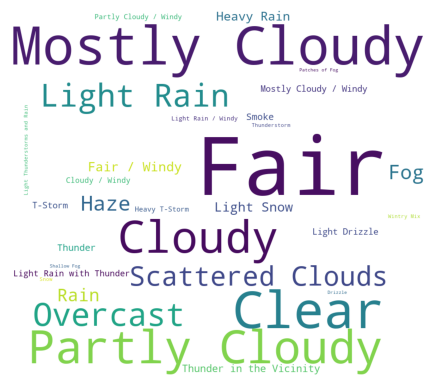

In [66]:
#seeing which words in weather condition has the most weights
data = new_df['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(width = 900, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [67]:
new_df['Weather_Condition'].unique()

array(['Clear', 'Partly Cloudy', 'Haze', 'Mostly Cloudy', 'Overcast',
       'Scattered Clouds', 'Light Rain', nan, 'Mist', 'Smoke', 'Fog',
       'Patches of Fog', 'Rain', 'Light Drizzle', 'Heavy Rain',
       'Shallow Fog', 'Light Snow', 'Snow', 'Light Freezing Fog',
       'Light Haze', 'Light Thunderstorms and Rain', 'Light Rain Showers',
       'Thunderstorms and Rain', 'Fair', 'Cloudy', 'Volcanic Ash',
       'Blowing Sand', 'Drizzle', 'Blowing Dust / Windy',
       'Widespread Dust', 'Fair / Windy', 'Rain Showers',
       'Mostly Cloudy / Windy', 'Light Rain / Windy', 'Hail',
       'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Light Freezing Rain',
       'Heavy Snow', 'Light Freezing Drizzle', 'Light Ice Pellets',
       'Ice 

In [68]:
#replacing the values into 5 categories 
#Rain, Snow, Low Visibility, Clear, Cloudy
new_df["Weather_Condition"] = new_df["Weather_Condition"].replace({'Clear':'Clear', 'Partly Cloudy':'Cloudy', 'Haze':'Low Visibility', 
                                                                   'Mostly Cloudy':'Cloudy', 'Overcast':'Cloudy','Scattered Clouds':'Cloudy', 
                                                                   'Light Rain':'Rain', 'Mist':'Low Visibility', 'Smoke':'Low Visibility', 
                                                                   'Fog':'Low Visibility', 'Patches of Fog':'Low Visibility', 
                                                                   'Rain':'Rain', 'Light Drizzle':'Rain', 'Heavy Rain':'Rain', 
                                                                   'Shallow Fog':'Low Visibility', 'Light Snow':'Snow', 'Snow':'Snow', 
                                                                   'Light Freezing Fog':'Low Visibility', 'Light Haze':'Low Visibility', 
                                                                   'Light Thunderstorms and Rain':'Rain', 'Light Rain Showers':'Rain',
                                                                   'Thunderstorms and Rain':'Rain', 'Fair':'Clear', 'Cloudy':'Cloudy', 
                                                                   'Volcanic Ash':'Low Visibility', 'Blowing Sand':'Low Visibility', 
                                                                   'Drizzle':'Rain', 'Blowing Dust / Windy':'Low Visibility', 
                                                                   'Widespread Dust':'Low Visibility', 'Fair / Windy':'Clear', 
                                                                   'Rain Showers':'Rain', 'Mostly Cloudy / Windy':'Cloudy', 
                                                                   'Light Rain / Windy':'Rain', 'Hail':'Snow', 'Heavy Drizzle':'Rain', 
                                                                   'Showers in the Vicinity':'Rain', 'Thunderstorm':'Rain', 
                                                                   'Light Rain Shower':'Rain', 'Light Rain with Thunder':'Rain',
                                                                   'Partly Cloudy / Windy':'Cloudy', 'Thunder in the Vicinity':'Rain', 
                                                                   'T-Storm':'Rain', 'Heavy Thunderstorms and Rain':'Rain', 
                                                                   'Thunder':'Rain', 'Heavy T-Storm':'Rain', 'Funnel Cloud':'Cloudy', 
                                                                   'Heavy T-Storm / Windy':'Rain', 'Light Freezing Rain':'Rain', 
                                                                   'Heavy Snow':'Snow', 'Light Freezing Drizzle':'Rain', 
                                                                   'Light Ice Pellets':'Snow', 'Ice Pellets':'Snow', 
                                                                   'Snow Grains':'Snow', 'Light Fog':'Low Visibility', 
                                                                   'Blowing Snow':'Snow', 'Rain / Windy':'Rain', 
                                                                   'Heavy Rain / Windy':'Rain', 'Squalls':'Rain', 'Thunder / Windy':'Rain',
                                                                   'N/A Precipitation':'Clear', 'Cloudy / Windy':'Cloudy', 
                                                                   'T-Storm / Windy':'Rain', 'Smoke / Windy':'Low Visibility', 
                                                                   'Haze / Windy':'Low Visibility', 'Drizzle and Fog':'Low Visibility', 
                                                                   'Wintry Mix':'Snow', 'Wintry Mix / Windy':'Snow', 
                                                                   'Light Snow / Windy':'Snow', 'Fog / Windy':'Low Visibility',
                                                                   'Light Drizzle / Windy':'Rain', 'Snow and Sleet':'Snow', 
                                                                   'Light Sleet':'Snow', 'Light Snow and Sleet':'Snow', 
                                                                   'Light Freezing Rain / Windy':'Rain', 'Thunder / Wintry Mix':'Snow', 
                                                                   'Sleet':'Snow', 'Freezing Rain':'Rain', 
                                                                   'Heavy Freezing Rain / Windy':'Rain', 'Heavy Freezing Rain':'Rain', 
                                                                   'Snow / Windy':'Snow', 'Heavy Snow / Windy':'Snow', 
                                                                   'Light Sleet / Windy':'Snow', 'Blowing Dust':'Low Visibility', 
                                                                   'Widespread Dust / Windy':'Low Visibility', 
                                                                   'Mist / Windy':'Low Visibility', 'Squalls / Windy':'Rain', 
                                                                   'Duststorm':'Low Visibility', 'Thunder and Hail':'Snow', 
                                                                   'Light Snow and Sleet / Windy':'Snow', 'Drizzle / Windy':'Rain', 
                                                                   'Blowing Snow / Windy':'Snow', 'Rain Shower':'Rain', 
                                                                   'Partial Fog':'Low Visibility', 'Snow and Sleet / Windy':'Snow', 
                                                                   'Patches of Fog / Windy':'Low Visibility', 
                                                                   'Light Rain Shower / Windy':'Rain', 'Heavy Sleet':'Snow', 
                                                                   'Light Snow Shower':'Snow', 'Small Hail':'Snow', 'Light Hail':'Snow', 
                                                                   'Heavy Smoke':'Low Visibility', 'Sand':'Low Visibility', 
                                                                   'Heavy Thunderstorms with Small Hail':'Snow', 
                                                                   'Light Thunderstorms and Snow':'Snow', 'Light Blowing Snow':'Snow',
                                                                   'Heavy Rain Showers':'Rain', 'Thunderstorms and Snow':'Snow', 
                                                                   'Heavy Thunderstorms and Snow':'Snow', 'Light Thunderstorm':'Rain', 
                                                                   'Light Snow Showers':'Snow', 'Dust Whirls':'Low Visibility', 
                                                                   'Rain Shower / Windy':'Rain', 'Heavy Snow with Thunder':'Snow', 
                                                                   'Freezing Drizzle':'Rain', 'Snow and Thunder':'Snow', 
                                                                   'Shallow Fog / Windy':'Low Visibility', 'Sleet / Windy':'Snow', 
                                                                   'Light Snow with Thunder':'Snow', 'Tornado':'Cloudy', 
                                                                   'Heavy Sleet and Thunder':'Snow', 'Sand / Windy':'Low Visibility',
                                                                   'Heavy Rain Shower / Windy':'Rain', 'Freezing Rain / Windy':'Rain',
                                                                   'Thunder / Wintry Mix / Windy':'Snow', 'Heavy Rain Shower':'Rain', 
                                                                   'Thunder and Hail / Windy':'Snow'})

In [69]:
new_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
728,A-729,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,0.000,Right hand shoulder blocked due to accident on...,Magazine St,Vallejo,Solano,CA,94591,2016-06-21 10:54:00,75.0,65.092284,48.0,30.00,10.0,25.973333,0.008287,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 days 00:30:00
729,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,0.000,Accident on I-880 Northbound at Exit 26 Tennys...,I-880 N,Hayward,Alameda,CA,94544,2016-06-21 10:54:00,75.0,65.092284,48.0,30.06,10.0,25.973333,0.008287,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 days 00:46:23
730,A-731,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,0.000,Right lane blocked due to accident on CA-24 We...,I-680 N,Walnut Creek,Contra Costa,CA,94595,2016-06-21 10:53:00,82.9,65.092284,31.0,29.97,10.0,25.973333,0.008287,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 days 00:30:00
731,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,0.000,#4 &amp; HOV lane blocked due to accident on I...,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,2016-06-21 10:56:00,75.9,65.092284,48.0,30.04,10.0,25.973333,0.008287,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 days 00:30:00
732,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,0.000,Right hand shoulder blocked due to accident on...,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,2016-06-21 09:50:00,75.2,65.092284,41.0,30.06,10.0,25.973333,0.008287,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 days 00:47:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,2019-08-23 17:53:00,86.0,86.000000,40.0,28.92,10.0,25.973333,0.000000,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 days 00:28:36
7728390,A-7777758,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,2019-08-23 18:53:00,70.0,70.000000,73.0,29.39,10.0,25.973333,0.000000,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 days 00:26:53
7728391,A-7777759,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,2019-08-23 18:53:00,73.0,73.000000,64.0,29.74,10.0,25.973333,0.000000,Cloudy,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 days 00:28:28
7728392,A-7777760,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,2019-08-23 18:51:00,71.0,71.000000,81.0,29.62,10.0,25.973333,0.000000,Clear,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0 days 00:29:21


In [70]:
#since we have a large enough dataset, we are dropping the null values in these columns 
new_df.dropna(subset=['Weather_Condition', 'Sunset', 'Civil_Twilight', 
                      'Nautical_Twilight', 'Astronomical_Twilight'], inplace=True)

In [71]:
#making sure there's no null values in the weather_condition column 
new_df['Weather_Condition'].isna().sum()

0

In [72]:
new_df.isnull().sum()

ID                          0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
Distance(mi)                0
Description                 5
Street                   5079
City                        0
County                      0
State                       0
Zipcode                     0
Weather_Timestamp           0
Temperature(F)              0
Wind_Chill(F)               0
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Speed(mph)             0
Precipitation(in)           0
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Calming             0
Traffic_Si

In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3859011 entries, 728 to 7728393
Data columns (total 38 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Severity               int64         
 1   Start_Time             datetime64[ns]
 2   End_Time               datetime64[ns]
 3   Start_Lat              float64       
 4   Start_Lng              float64       
 5   Distance(mi)           float64       
 6   Description            object        
 7   Street                 object        
 8   City                   object        
 9   County                 object        
 10  State                  object        
 11  Zipcode                object        
 12  Weather_Timestamp      datetime64[ns]
 13  Temperature(F)         float64       
 14  Wind_Chill(F)          float64       
 15  Humidity(%)            float64       
 16  Pressure(in)           float64       
 17  Visibility(mi)         float64       
 18  Wind_Speed(mph)        fl

### Number of Accidents over the Years

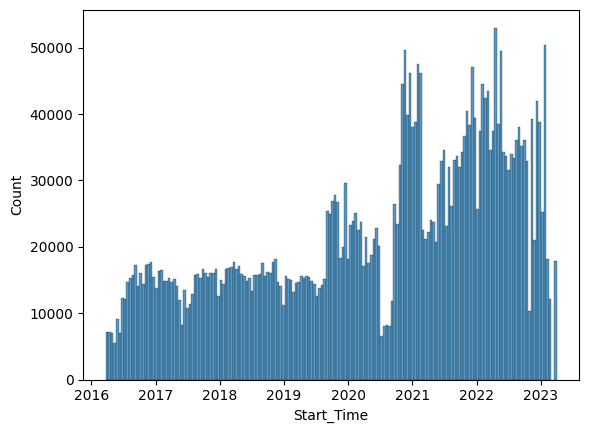

In [41]:
ax = sns.histplot(data=new_df, x=new_df['Start_Time'])
plt.show()

The drop in mid 2020 could be explain by the Covid shutdown where many people were inside. Thus, leading to less cars are the roads.

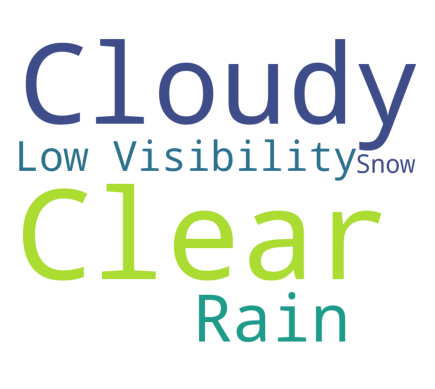

In [74]:
#seeing which words in weather condition has the most weights AFTER binning them to 5 categories 
data = new_df['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(width = 900, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [73]:
new_df['Severity'].value_counts()

Severity
2    3186345
3     598143
4      46033
1      28490
Name: count, dtype: int64

In [43]:
#grouping the severity classes to have a binary classification 
#Not Severe = 0
#Severe = 1
new_df['Severity'] = new_df['Severity'].replace({1:0, 2:0, 3:1, 4:1})

In [44]:
#grouping the not severe by states
severity_count_0 = new_df[new_df['Severity'] == 0].groupby('State').size()
severity_count_0

State
CA    1421394
FL     750332
NY     264664
SC     329700
TX     448745
dtype: int64

In [45]:
#seeing how many severe we have by states
severity_count_1 = new_df[new_df['Severity'] == 1].groupby('State').size()
severity_count_1

State
CA    279460
FL    115520
NY     79937
SC     44762
TX    124497
dtype: int64

In [46]:
new_df['State'].value_counts()

State
CA    1700854
FL     865852
TX     573242
SC     374462
NY     344601
Name: count, dtype: int64

In [47]:
new_df['Severity'].value_counts()

Severity
0    3214835
1     644176
Name: count, dtype: int64

In [48]:
#creating a new, smaller csv file 
# new_df.to_csv('new_df.csv')

<Axes: >

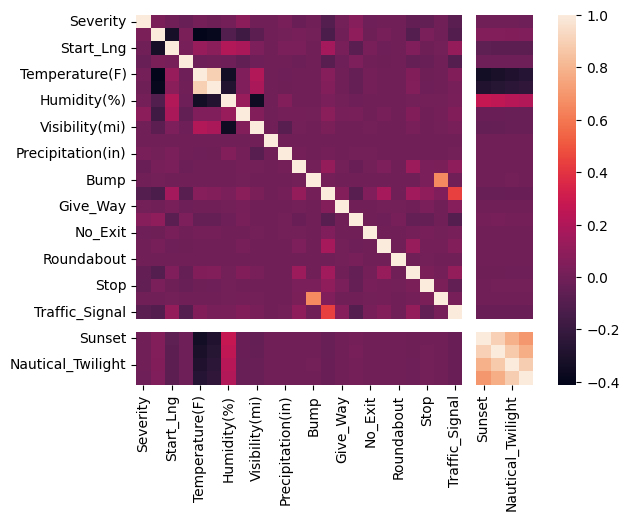

In [52]:
numeric_df = new_df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=False)